# Задача 1. Разведочный анализ

- Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- Считать данные и вывести их основные характеристики, описание признаков.
- Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- (**+2 балла**) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- (**+1 балл**) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- (**+2 балла**) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pathlib

# устанавливаем точность чисел с плавающей точкой
%precision % .4f

import warnings

warnings.filterwarnings('ignore')  # отключаем предупреждения
dataset_path = pathlib.Path().resolve().parent / "datasets" / "youtube" / "GBvideos.csv"

# Датасет
Будет использоватся [Датасет](https://www.kaggle.com/datasets/datasnaek/youtube-new?select=RUvideos.csv). Данный набор данных содержит информацию об ежедневных тенденциях на YouTube, охватывающую несколько месяцев, и его объем по-прежнему растет. Информация доступна для США, Великобритании, Германии, Канады и Франции, включая до 200 самых популярных видеороликов каждый день в каждом из этих регионов. Для моей работы я выбрал Великобританию.

## Признаки
video_id - id видео\
trending_data - дата тренда\
title - название видео\
channel_title - название канала\
category_id - id категории (Фильмы и анимации, авто, музыка и т.д.)\
publish_time - время публикации видео\
tags - тэги под видео\
views - количество просмотров\
likes - количество лайков\
dislikes - количество дизлайков
comment_count - количество комментариев\
thumbnail_link - ссылка на видео\
comments_disabled - отключены ли комментарии\
rating_disabled - отключен ли показ лайков и дизлайков\
video_error_or_removed - доступно видео или нет\
description - описание видео

In [2]:
df = pd.read_csv(dataset_path)

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

## Data cleaning
Можно заметить, что у description есть нулевые значения

In [5]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64

А именно 612. Заменим все нуллевые значения пустой строчкой

In [6]:
df.description = df.description.fillna("")
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

Рассмотри распределение категорий

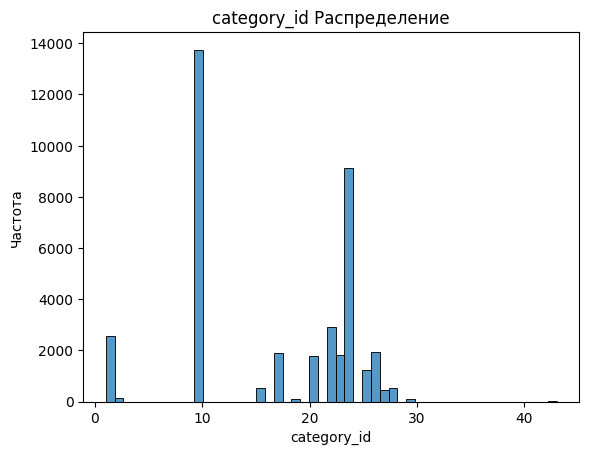

In [7]:
plt.figure()
sns.histplot(df["category_id"].dropna())
plt.title("category_id Распределение")
plt.xlabel("category_id")
plt.ylabel("Частота")
plt.show()

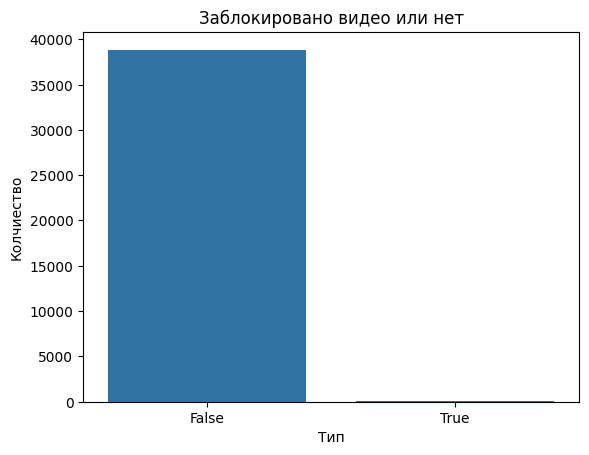

In [8]:
plt.figure()
sns.countplot(x="video_error_or_removed", data=df)
plt.title("Заблокировано видео или нет")
plt.xlabel("Тип")
plt.ylabel("Колчиество")
plt.show()

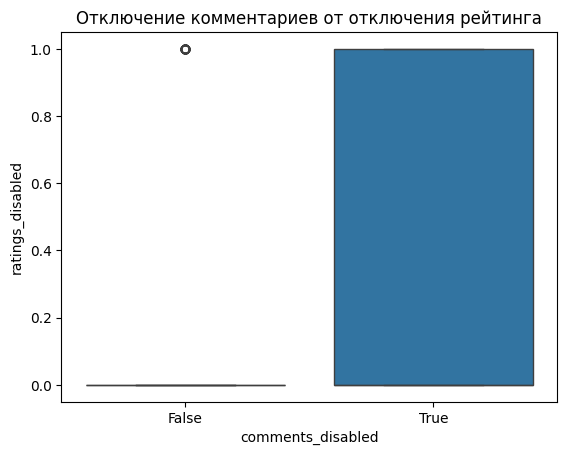

In [9]:
plt.figure()
sns.boxplot(x="comments_disabled", y="ratings_disabled", data=df)
plt.title("Отключение комментариев от отключения рейтинга")
plt.xlabel("comments_disabled")
plt.ylabel("ratings_disabled")
plt.show()

## Feature Engineering
## Отлично, теперь уберём все ненужные признаки и будем искать просмотры видео

In [10]:
df.drop(columns=["video_id", "trending_date", "thumbnail_link"], inplace=True)

Удалим данные, в которых видео удаленно, или отключены комментарии/лайки

In [11]:
df.drop(df[df.video_error_or_removed == True].index, inplace=True)
assert df["video_error_or_removed"].unique() == [False]

df.drop(df[df.comments_disabled == True].index, inplace=True)
assert df["comments_disabled"].unique() == [False]

df.drop(df[df.ratings_disabled == True].index, inplace=True)
assert df["ratings_disabled"].unique() == [False]

df.drop(columns=["video_error_or_removed", "comments_disabled", "ratings_disabled"], inplace=True)

Заменим title, tags, description на количество слов в них

In [12]:
df["title"] = df["title"].apply(lambda x: len(str(x).split(' ')))
df["tags"] = df["tags"].apply(lambda x: len(str(x).split(' ')))
df["description"] = df["description"].apply(lambda x: len(str(x).split(' ')))

Заменим название каналов на их "id"(сгенерированные)

In [13]:
ctdict = dict()
dictnum = 1

def channel_title_devide(channel_title):
    global dictnum
    if channel_title not in ctdict:
        ctdict[channel_title] = dictnum
        dictnum += 1
    return ctdict[channel_title]

df["channel_title"] = df["channel_title"].apply(channel_title_devide)

df["channel_title"].unique()

array([   1,    2,    3, ..., 1588, 1589, 1590])

Заменим дату публикации на месяц, в который оно вышло

In [14]:
from datetime import datetime

def month_by_publish_time(publish_time):
    date = datetime.strptime(publish_time[0:10], '%Y-%m-%d')
    return date.month

df["publish_time"] = df["publish_time"].apply(month_by_publish_time)

df["publish_time"].unique()

array([11,  8,  3,  7,  6,  9, 10, 12,  2,  4,  1,  5])

# Посторим корреляционную матрицу

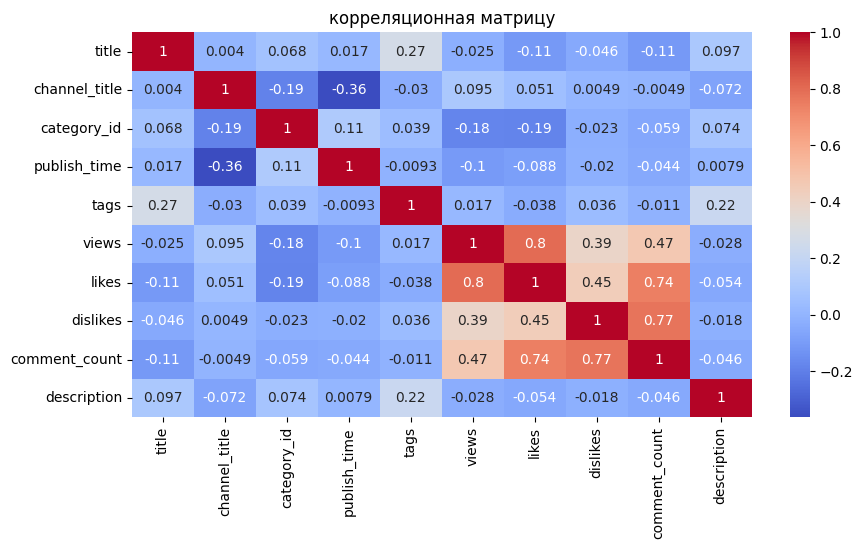

In [15]:
df_corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("корреляционная матрицу")
plt.show()

Видно, что количество просмотров зависит от количества лайков и комментариев, что не удивительно. Так же можно заметить, что не важен месяц, в котором выпскалось видео, описание, название видео.